<a href="https://colab.research.google.com/github/BhanuPShahi/Airbnb-Bookings-Analysis/blob/main/Bhanu_Pratap_Shahi_24_02_2021_%5BABTN0101%5D_AirBnB_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##[ABTN0101] AirBnB Bookings Analysis

Introduction -

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

Dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

Explore and analyze the data to discover key understandings (not limited to these) such as : 

1.What can we learn about different hosts and areas?

2.What can we learn from predictions? (ex: locations, prices, reviews, etc)

3.Which hosts are the busiest and why?

4.Is there any noticeable difference of traffic among different areas and what could be the reason for it?

##Importing Libraries


In [40]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


##Loading the data set

In [41]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
#loading the data file and creating a dataframe
path='/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Week 4/Day 3/AirBnB Bookings Analysis/Airbnb NYC 2019.csv'
airbnb_df=pd.read_csv(path)

##Exploring the data


In this step we are going to perform the following operations..
*   Checking the shape of the dataframe.
*   Checking the info of the dataset.
*   Printing the head of the dataset.
*   Checking the summary of the dataset.




In [43]:
#checking the shape of airbnb_df
airbnb_df.shape

(48895, 16)

In [44]:
#checking the info of airbnb_df
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [45]:
airbnb_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [46]:
#Printing the summary of numerical attributes
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


##**Handling the missing values**

##Check for Missing Data

In [47]:
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

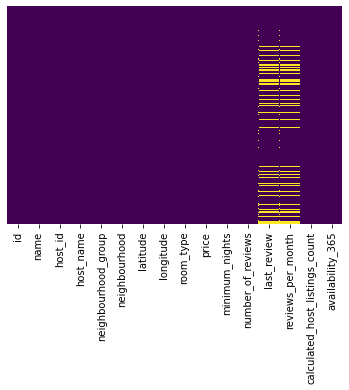

In [48]:
#checking the missing data in the dataset
sns.heatmap(airbnb_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.rcParams['figure.figsize'] = (10, 5)


##Cleaning the data 

I am replacing NaN values of 'reviews_per_month' column with 0.

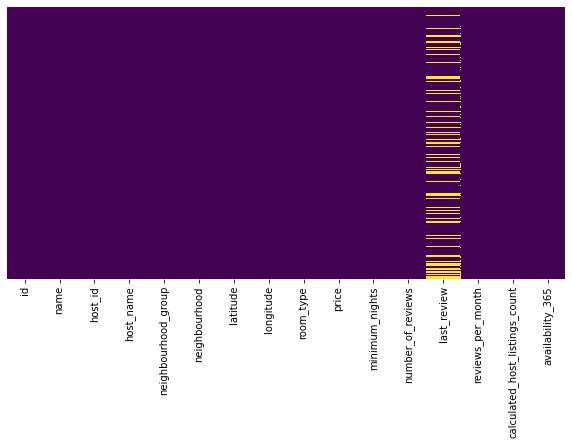

In [49]:
#replacing NaN values of 'reviews_per_month' column with 0
airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].fillna(0)
sns.heatmap(airbnb_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Checking the rows having null value in name and host_name column.**

In [50]:
airbnb_df[airbnb_df['name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,0.00,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,0.00,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,0.00,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,0.00,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,0.00,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,0.00,5,0


We can see that 10 out of 16 of rows having **NaN** as name value have 0 reviews.
There may be a case that while listing the name was not entered and that's why people are not prefering those places.
So i am dropping those rows.

In [51]:
#dropping those rows having null name value
new_airbnb_df=airbnb_df[~airbnb_df['name'].isnull()]

In [52]:
airbnb_df[airbnb_df['host_name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,0.00,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaN,0.00,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0


In [53]:
#dropping those rows having null host_name value
new_airbnb_df=new_airbnb_df[~new_airbnb_df['host_name'].isnull()]
new_airbnb_df.shape

(48858, 16)

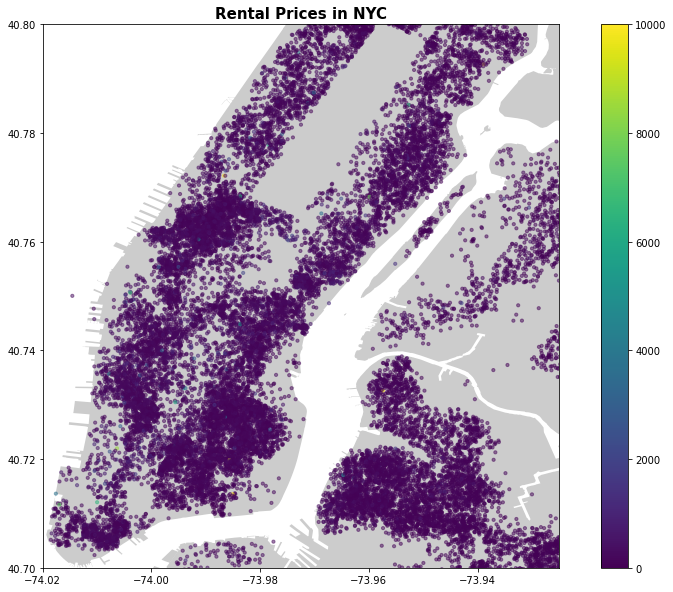

In [55]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
#loading the newyork city map
street_map = gpd.read_file('/content/drive/MyDrive/Borough Boundaries/geo_export_1e2a2aa9-e199-431f-8868-79b2b9366ce2.shp')

# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(airbnb_df['longitude'], airbnb_df['latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(airbnb_df,geometry = geometry)
 
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,10))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')
geo_df.plot(column='price',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
plt.title('Rental Prices in NYC', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-74.02,-73.925)
plt.ylim( 40.7,40.8)
# show map
plt.show()

**What are neighbourhoods?**

### *Neighborhoods* are a way to help travelers make informed decisions about where to stay when planning a trip. When visiting a new city, it can be helpful to know which neighborhoods may fit your interests and the purpose of your trip.

##1.What can we learn about different hosts and areas?

##Exploring the categorical columns

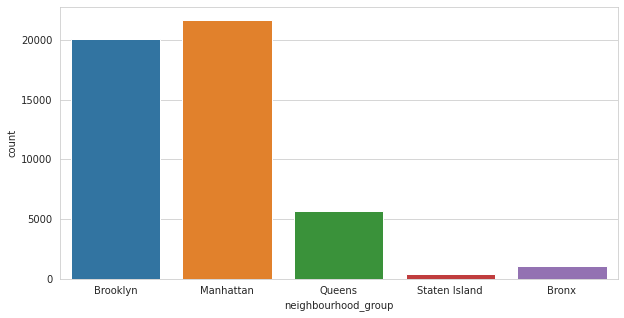

In [56]:
#Visualising the data according to area
plt.rcParams['figure.figsize'] = (10, 5)
sns.set_style('whitegrid')
sns.countplot(x='neighbourhood_group',data=airbnb_df)

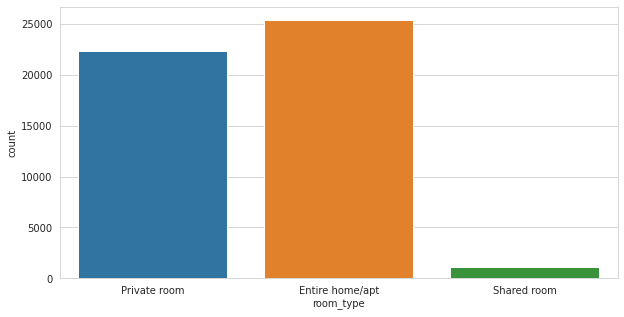

In [57]:
#visualising the data according to room_type
plt.rcParams['figure.figsize'] = (10, 5)
sns.set_style('whitegrid')
sns.countplot(x='room_type',data=airbnb_df)

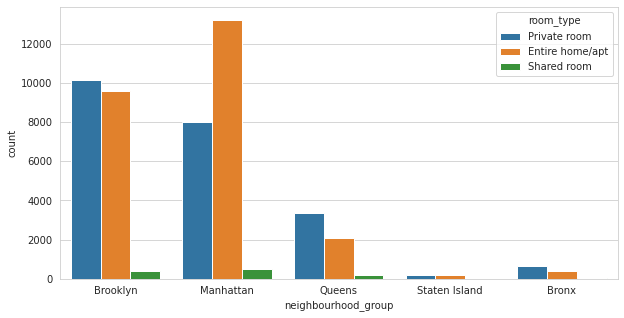

In [58]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.set_style('whitegrid')
sns.countplot(x='neighbourhood_group',hue='room_type',data=airbnb_df)

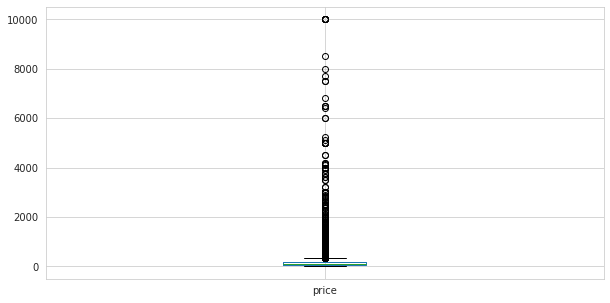

In [59]:
airbnb_df.boxplot(column=['price'])
plt.show()
plt.rcParams['figure.figsize'] = (20, 10)


In [60]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'geometry'],
      dtype='object')

In [61]:
area_df = airbnb_df[['neighbourhood']]
area_df['number_of_bookings']=airbnb_df['id']
grouped_area_df=area_df.groupby('neighbourhood').count().reset_index()
grouped_area_df.sort_values('number_of_bookings',ascending=False,inplace=True,ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [62]:
airbnb_df[['number_of_reviews','reviews_per_month']].fillna(0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [63]:
airbnb_df[airbnb_df['availability_365']==0].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,POINT (-73.94399 40.79851)
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,POINT (-73.95596 40.68688)
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,POINT (-73.96723 40.80178)
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0,POINT (-74.00525 40.73530)
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0,POINT (-73.95718 40.71842)


In [64]:
airbnb_df.sort_values('last_review',ascending=False,inplace=True,ignore_index=True)
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,36455809,"Cozy Private Room in Bushwick, Brooklyn",74162901,Christine,Brooklyn,Bushwick,40.69805,-73.92801,Private room,30,1,1,2019-07-08,1.00,1,1,POINT (-73.92801 40.69805)
1,33119863,Queens Studio.,42540127,Tio,Queens,Bayside,40.77067,-73.78278,Entire home/apt,55,2,37,2019-07-08,10.37,1,6,POINT (-73.78278 40.77067)
2,34244391,A space like a home,258536261,Judy,Brooklyn,Cypress Hills,40.67959,-73.88302,Entire home/apt,100,2,11,2019-07-08,5.69,1,179,POINT (-73.88302 40.67959)
3,34231172,Fully renovated brick house floor in Brooklyn,59642348,Kevin,Brooklyn,Sunset Park,40.64550,-74.01262,Entire home/apt,95,1,9,2019-07-08,9.00,1,106,POINT (-74.01262 40.64550)
4,34204893,Gorgeous spacious 1 bedroom apartment,85773188,Mark,Brooklyn,Brighton Beach,40.57589,-73.96636,Entire home/apt,86,1,10,2019-07-08,9.09,1,20,POINT (-73.96636 40.57589)


In [65]:
grouped_area_df.head(5)

,neighbourhood,number_of_bookings
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971


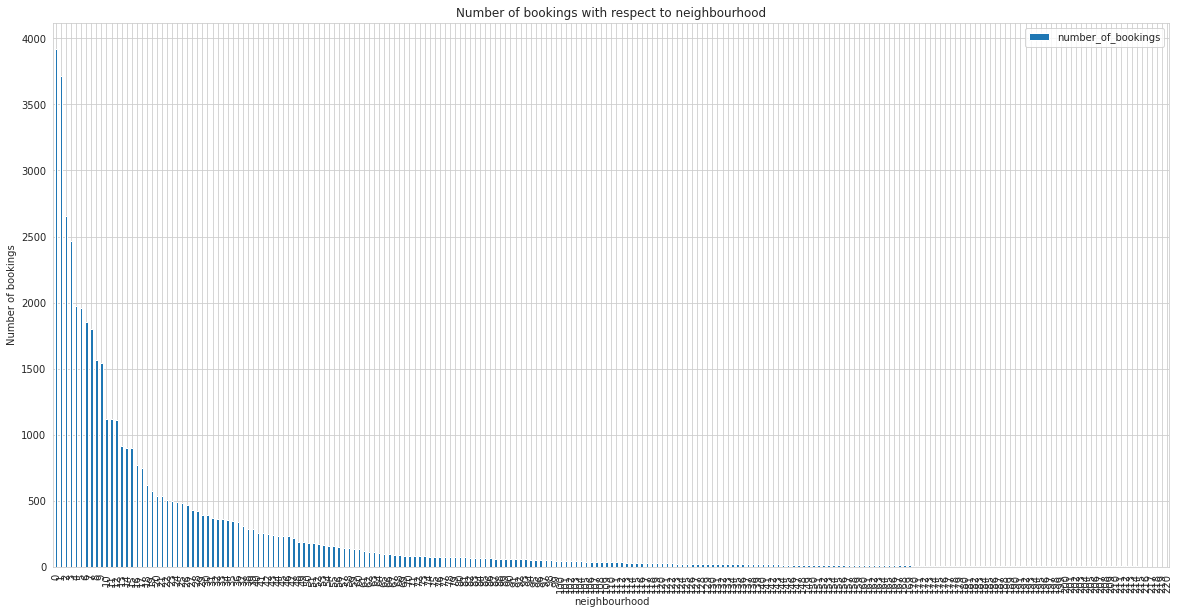

In [66]:
# Create the plot object
grouped_area_df.plot(kind='bar')

plt.title('Number of bookings with respect to neighbourhood')
plt.ylabel('Number of bookings')
plt.xlabel('neighbourhood')

# Set the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (40, 10)

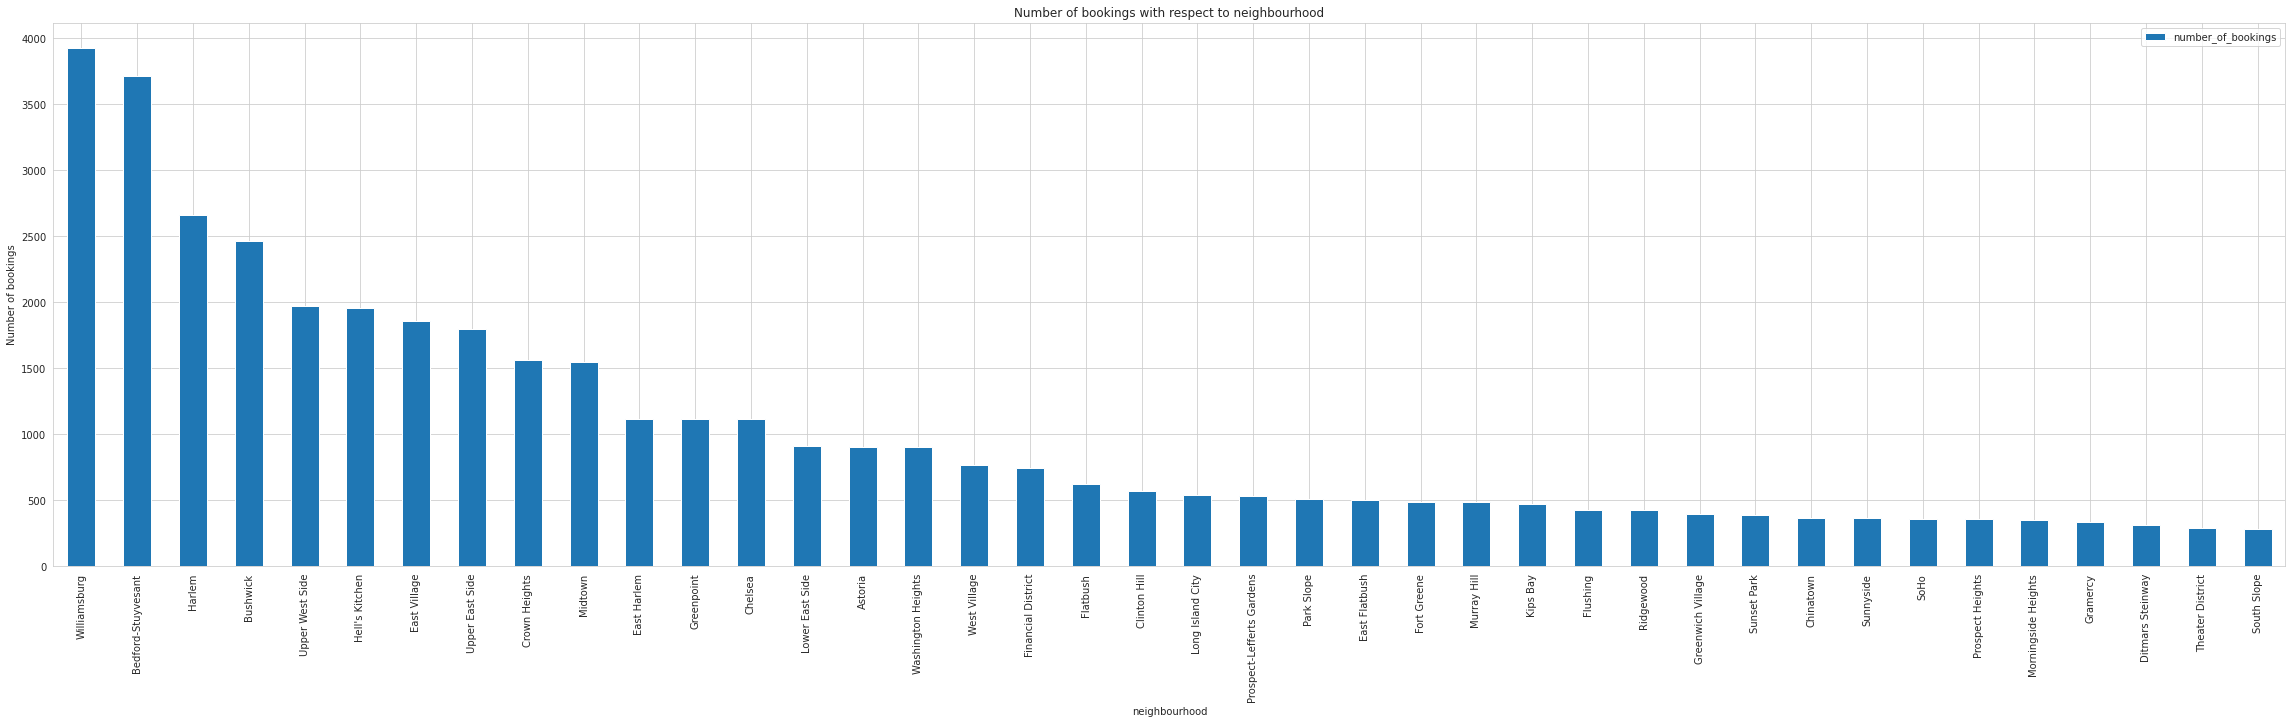

In [67]:
#plotting the top 40 preferred area
top_40_preferred_area_df=grouped_area_df[0:40]
top_40_preferred_area_df.plot(x = "neighbourhood", y = "number_of_bookings", kind = "bar")
plt.title('Number of bookings with respect to neighbourhood')
plt.ylabel('Number of bookings')
plt.xlabel('neighbourhood')
plt.rcParams['figure.figsize'] = (20, 10)
plt.show()

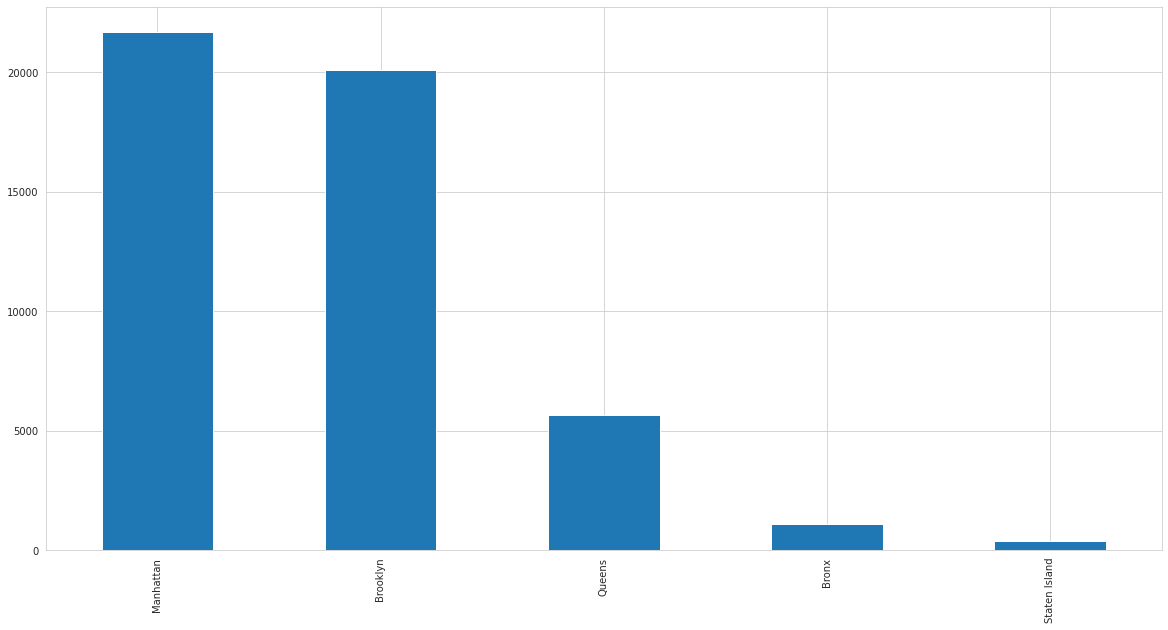

In [68]:
# airbnb_df['neighbourhood_group'].value_count().plot(kind='bar')
airbnb_df['neighbourhood_group'].value_counts().plot(kind='bar')

# plt.rcParams['figure.figsize'] = (10, 5)


# Area Analysis

*   Manhattan neighbourhood_group is most in demand followed by Brooklyn.





In [69]:
host_df=airbnb_df.groupby('host_name').count().reset_index()
host_df.sort_values('id',ascending=False,inplace=True,ignore_index=True)
host_df.shape


(11452, 17)

##3.Which hosts are the busiest and why?

In [70]:
airbnb_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,36455809,"Cozy Private Room in Bushwick, Brooklyn",74162901,Christine,Brooklyn,Bushwick,40.69805,-73.92801,Private room,30,1,1,2019-07-08,1.00,1,1,POINT (-73.92801 40.69805)
1,33119863,Queens Studio.,42540127,Tio,Queens,Bayside,40.77067,-73.78278,Entire home/apt,55,2,37,2019-07-08,10.37,1,6,POINT (-73.78278 40.77067)


In [71]:
host_having_max_listings=airbnb_df[airbnb_df['calculated_host_listings_count']==airbnb_df.calculated_host_listings_count.max()]

In [72]:
host_having_max_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
7454,32634874,Sonder | Stock Exchange | Pristine 1BR + Sofa Bed,219517861,Sonder (NYC),Manhattan,Financial District,40.70604,-74.01216,Entire home/apt,248,2,7,2019-06-26,2.59,327,294,POINT (-74.01216 40.70604)
8276,34341994,Sonder | 116 John | Polished 2BR + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70781,-74.00525,Entire home/apt,179,29,1,2019-06-24,1.00,327,339,POINT (-74.00525 40.70781)
8390,32224172,Sonder | Stock Exchange | Restful 1BR + Kitchen,219517861,Sonder (NYC),Manhattan,Financial District,40.70752,-74.01046,Entire home/apt,235,2,7,2019-06-24,1.52,327,306,POINT (-74.01046 40.70752)
8638,32237811,Sonder | Stock Exchange | Design Studio + Laundry,219517861,Sonder (NYC),Manhattan,Financial District,40.70797,-74.01227,Entire home/apt,205,2,10,2019-06-24,2.54,327,338,POINT (-74.01227 40.70797)
8641,32237138,Sonder | Stock Exchange | Lively Studio + Kitchen,219517861,Sonder (NYC),Manhattan,Financial District,40.70714,-74.01225,Entire home/apt,203,2,7,2019-06-24,1.88,327,338,POINT (-74.01225 40.70714)


In [73]:
place_having_max_reviews=airbnb_df[airbnb_df['number_of_reviews']==airbnb_df.number_of_reviews.max()]

In [74]:
place_having_max_reviews.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
1691,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.6673,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333,POINT (-73.76831 40.66730)


In [ ]:
airbnb_df.sort_values('number_of_reviews',ascending=False,ignore_index=True).head(5)

##Analysis on availability_365 column

In [ ]:
#extracting those rows having 0 value in availability_365 column
zero_availability_df=airbnb_df[airbnb_df['availability_365']==0]

There may be two possibilities for 0 value in availability column.


*   May be that place was previously available for booking but closed currently.
*   There may be a chance of bad entry.



In [ ]:
#sorting them according to their last review date
zero_availability_df.sort_values('last_review',ascending=False,inplace=True,ignore_index=True)
print(zero_availability_df.shape)
zero_availability_df.head()

**Conclusion**

There are more than 17000 rows having availability as 0.
So this should be the case that those rental places are currently closed or not accepting new bookings.

We can check their last_review date and can assume that after that they are not operational.

In [ ]:
zero_availability_df['neighbourhood_group'].value_counts().plot(kind='bar')


##Price Analysis

In [ ]:
#summary of descriptive statistics
airbnb_df['price'].describe()

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (20, 10)
sns.distplot(airbnb_df['price']);

In [ ]:
plt.hist(airbnb_df.price, color='green')
plt.xlabel('price')
plt.ylabel('number_of_bookings')
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
airbnb_df.sort_values('price',ascending=False,ignore_index=True).head()


Here the price value like 0 and 10000 are outliers.

In [ ]:
airbnb_df.sort_values(['price','number_of_reviews'],ascending=False,ignore_index=True).head()


In [ ]:
# list of numerical variables
numerical_features = [feature for feature in new_airbnb_df.columns if new_airbnb_df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
new_airbnb_df[numerical_features].describe()